In [1]:
code_dir = "../UXO_protected/+BTInvertPY"

In [2]:
import numpy as np
import os
import h5py
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm as cmap
from matplotlib import colors
from matplotlib.colors import Normalize
from mpl_toolkits import mplot3d

import uxo_utils
from uxo_utils import (
    SensorInfo, Model, preCalcLoopCorners, FModParam, 
    forwardWithQ, sensorCoords2RxCoords, hprimary, formQmatrix
)

In [3]:
from matplotlib import rcParams
rcParams['font.size'] = 14
np.random.seed(2020)

In [8]:
sensorinfo = uxo_utils.load_sensor_info()
ordnance = uxo_utils.load_ordnance_dict()
times = ordnance["ISO Small"]["times"]
ordnance.keys()

dict_keys(['105mm', '2.36-in', '2.75-in', '2.95-in', '20-lb Bomb', '25-lb Bomb', '3-in', '3.5-in', '30mm', '37mm', '4-in', '4-in Sphere', '4.2-in', '4.5-in', '4.52-in', '5-lb Bomb', '57mm', '60mm', '66mm', '75mm', '76mm', '81mm', '90mm', '106mm', 'ISO Large', 'ISO Medium', 'ISO Small', '2.25-in'])

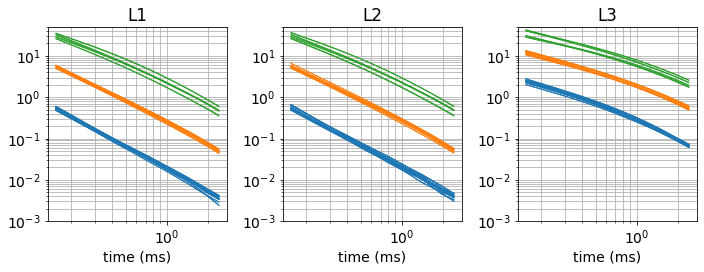

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i, plot_me in enumerate(["ISO Small", "ISO Medium", "ISO Large"]):
    for l, a in zip(["L1", "L2", "L3"], ax):
        L = np.array(ordnance[plot_me][l][:])
        a.loglog(times, L.T, color=f"C{i}", label=plot_me, lw=1)
        a.set_title(l)

for a in ax:
    a.grid(which="both")
    a.set_xlabel("time (ms)")
    a.set_ylim([1e-3, 50])
        
plt.tight_layout()

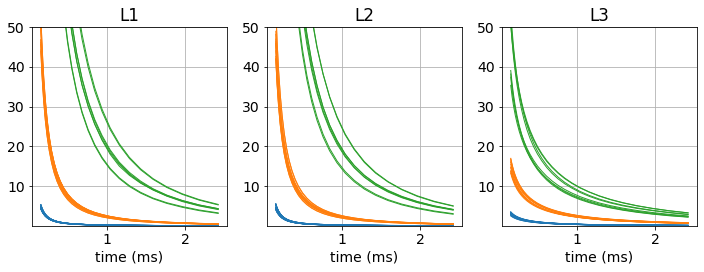

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i, plot_me in enumerate(["ISO Small", "ISO Medium", "ISO Large"]):
    for l, a in zip(["L1", "L2", "L3"], ax):
        L = np.array(ordnance[plot_me][l][:])
        a.loglog(times, L.T, color=f"C{i}", label=plot_me, lw=1)
        a.set_title(l)

for a in ax:
    a.grid(which="both")
    a.set_xlabel("time (ms)")
    a.set_ylim([1e-3, 50])
        
plt.tight_layout()

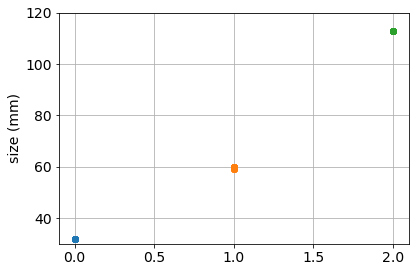

In [37]:
fig, ax = plt.subplots(1, 1)

for i, plot_me in enumerate(["ISO Small", "ISO Medium", "ISO Large"]):
    size = np.array(ordnance[plot_me]["size mm"][:])
    ax.plot(np.ones(len(size))*i, size, 'o', color=f"C{i}", label=plot_me, lw=1)

ax.grid(which="both")
ax.set_ylabel("size (mm)")
ax.set_ylim([30, 120])
        
plt.tight_layout()

In [46]:
ordnance["ISO Small"]["size mm"]

[32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32]